<a href="https://colab.research.google.com/github/JoaoAnjos-DataScience/JoaoAnjos-DataScience/blob/main/Modelo_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicio Do Código

In [ ]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

#Carregar os dados
data = pd.read_csv("/content/review_clientes_melhores_compras.csv")
data.head(n=5)


,review_id,review_cliente,sentimento
0,e64fb393e7b32834bb789ff8bb30750e,receber bem antar prazo estipular,1
1,f7c4243c7fe1938f181bec41a392bdeb,parabens melhores compras adorar comprar inter...,1
2,8670d52e15e00043ae7de4c01cc2fe06,recomendar aparelhar eficiente site marcar apa...,1
3,4b49719c8a200003f700d3d986ea1a19,pouco travar valor ta bom,1
4,3948b09f7c818e2d86c9a546758b2335,super recomendar vendedor confiavel produto ok...,1


#Iniciando as métricas para o modelo Naive Bayes


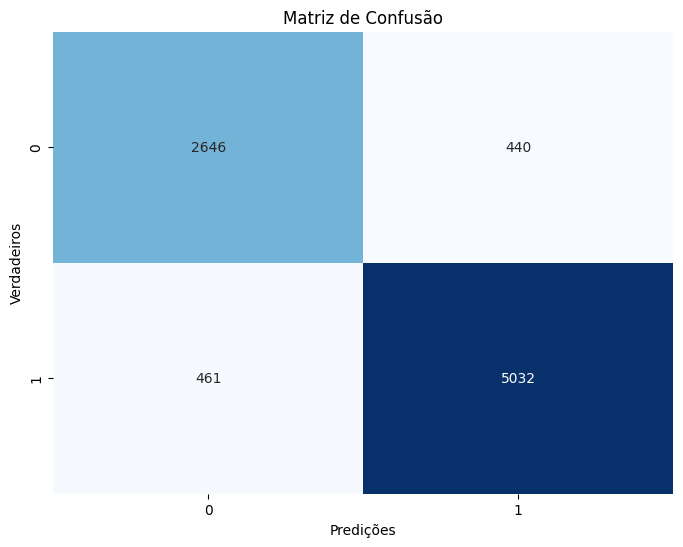

Acurácia: 89.50%
Matriz de COnfusão:
[[2646  440]
 [ 461 5032]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3086
           1       0.92      0.92      0.92      5493

    accuracy                           0.89      8579
   macro avg       0.89      0.89      0.89      8579
weighted avg       0.90      0.89      0.90      8579



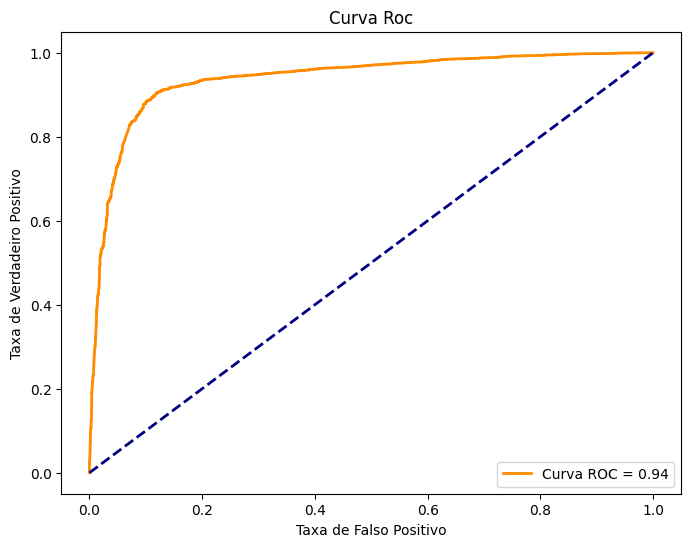

In [ ]:
#Dividir conjunto Treino e Teste para o modelo Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(data['review_cliente'], data['sentimento'], test_size=0.2 , random_state=42)

# Pré-processamento: Vetorizar palavras para o modelo
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Treinar Modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized,y_train)

#Fazer previsão conjunto de teste
y_pred = nb_model.predict(X_test_vectorized)

#Avalição do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Gerando Gráfico de Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

#Visualizar resultados
print(f'Acurácia: {accuracy * 100:.2f}%')
print(f'Matriz de COnfusão:\n{conf_matrix}')
print(f'Relatório de Classificação:\n{classification_rep}')

#Calculando curva roc
y_prob = nb_model.predict_proba(X_test_vectorized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


#Plotando Curva ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'Curva ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva Roc')
plt.legend(loc='lower right')
plt.show()





In [ ]:
# Nova revisão para teste
nova_revisao = ["Estou insatisfeito com a entrega demorou muito"]

# Pré-processamento da nova revisão
nova_revisao_vectorizada = vectorizer.transform(nova_revisao)

# Fazer previsão usando o modelo treinado
resultado_predicao = nb_model.predict(nova_revisao_vectorizada)

# Exibir o resultado da previsão
print(f"A previsão para a nova revisão é: {resultado_predicao[0]}")


A previsão para a nova revisão é: 0
